1. remove any athlete that hasnt completed all workouts
2. metric height weight
3. merge open and qf
4. use this dataset for analysis


In [1]:
import numpy as np
import pandas as pd

female_open_data = pd.read_csv('./femaleAthletesOpen2.csv')
female_qf_data = pd.read_csv('./femaleAthletesqf2.csv')
female_open_data.head(5)

,id,openrank,name,gender,country,region,age,weight(kg),height(cm),22.1Score(reps),22.1Rank,22.2Score,22.2Rank,22.3Score,22.3Rank
0,1239980,1,Mallory O'Brien,F,United States,North America,18,135 lb,63 in,392 reps,1,07:09,2,04:11,1
1,163097,2,Tia-Clair Toomey,F,Australia,Oceania,28,58 kg,163 cm,375 reps,5,07:05,1,04:12,2
2,671666,3,Haley Adams,F,United States,North America,21,140 lb,67 in,366 reps,14,08:13,16,04:44,8
3,996866,4,Laurie Clément,F,France,Europe,35,60 kg,159 cm,369 reps,10,08:06,11,05:05,20
4,168305,5,Brooke Wells,F,United States,North America,27,150 lb,66 in,363 reps,21,07:56,6,04:56,16


In [2]:
female_open_data.isna().sum()

id                    0
openrank              0
name                  0
gender                0
country              51
region                0
age                   0
weight(kg)         1513
height(cm)         1656
22.1Score(reps)       0
22.1Rank              0
22.2Score             0
22.2Rank              0
22.3Score             0
22.3Rank              0
dtype: int64

In [3]:
female_qf_data.isna().sum()

id                     0
QFrank                 0
name                   0
gender                 0
country               18
region                 0
age                    0
weight              1713
height              1802
QFOneScore           343
QFOneRank              0
QFTwoScore           386
QFTwoRank              0
QFThreeScore         409
QFThreeRank            0
QFFourScore(lbs)     369
QFFourRank             0
QFFiveScore          517
QFFiveRank             0
dtype: int64

In [4]:
female_qf_data['id'].value_counts()

163097     1
1868523    1
631934     1
1680097    1
1073634    1
          ..
1171969    1
297152     1
523504     1
484998     1
2173619    1
Name: id, Length: 5279, dtype: int64

In [5]:
female_open_data['id'].value_counts()

1239980    1
551889     1
1299894    1
982047     1
1778703    1
          ..
384343     1
692841     1
1849026    1
1246871    1
20916      1
Name: id, Length: 5300, dtype: int64

In [6]:
clean_qf_data = female_qf_data.dropna(subset=['QFOneScore', 'QFTwoScore', 'QFThreeScore', 'QFFourScore(lbs)', 'QFFiveScore'])

In [7]:
female_open_data

,id,openrank,name,gender,country,region,age,weight(kg),height(cm),22.1Score(reps),22.1Rank,22.2Score,22.2Rank,22.3Score,22.3Rank
0,1239980,1,Mallory O'Brien,F,United States,North America,18,135 lb,63 in,392 reps,1,07:09,2,04:11,1
1,163097,2,Tia-Clair Toomey,F,Australia,Oceania,28,58 kg,163 cm,375 reps,5,07:05,1,04:12,2
2,671666,3,Haley Adams,F,United States,North America,21,140 lb,67 in,366 reps,14,08:13,16,04:44,8
3,996866,4,Laurie Clément,F,France,Europe,35,60 kg,159 cm,369 reps,10,08:06,11,05:05,20
4,168305,5,Brooke Wells,F,United States,North America,27,150 lb,66 in,363 reps,21,07:56,6,04:56,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,103484,5296,Kasey Fulwider,F,United States,North America,41,125 lb,62 in,269 reps,5597,155 reps,11309,10:22,3968
5296,1337814,5297,Paula Borras,F,Spain,Europe,33,NaN,NaN,270 reps,4912,159 reps,9183,11:54,6782
5297,903485,5298,Jannicke Aagaard,F,Norway,Europe,47,57 kg,163 cm,270 reps,4912,155 reps,11309,10:49,4659
5298,570087,5299,Devin Compo,F,United States,North America,39,158 lb,68 in,242 reps,10706,184 reps,2045,208 reps,8138


In [8]:
clean_qf_data

,id,QFrank,name,gender,country,region,age,weight,height,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore(lbs),QFFourRank,QFFiveScore,QFFiveRank
0,163097,1,Tia-Clair Toomey,F,Australia,Oceania,28,58 kg,163 cm,05:28,4,06:29,1,14:07,3,748 lbs,7,03:08,3
1,2942,2,Kara Saunders,F,Australia,Oceania,32,158 lb,162 cm,06:29,35,07:05,2,15:55,63,755 lbs,4,03:22,12
2,764556,3,Gabriela Migała,F,Poland,Europe,23,75 kg,170 cm,05:37,6,09:27,88,13:48,2,706 lbs,24,03:21,11
3,1239980,4,Mallory O'Brien,F,United States,North America,18,135 lb,63 in,05:59,12,07:28,10,15:16,23,676 lbs,80,03:29,18
4,503582,5,Alexis Raptis,F,United States,North America,23,138 lb,65 in,05:20,2,08:20,28,15:37,47,701 lbs,31,03:43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,1600779,4986,Morgan Nordstrom,F,United States,North America,37,160 lb,68 in,50 reps,4929,60 reps,3808,167 reps,4598,300 lbs,4899,50 reps,2870
4986,1962399,4987,Susan Xu,F,China,Asia,36,57 kg,165 cm,120 reps,4804,60 reps,3808,122 reps,4806,348 lbs,4862,50 reps,2870
4987,1802921,4988,Jayde Leota,F,Samoa,Oceania,34,NaN,NaN,122 reps,4750,30 reps,4870,184 reps,4393,419 lbs,4309,50 reps,2870
4990,1337341,4991,Florie Boillot,F,France,Europe,37,65 kg,165 cm,126 reps,4655,30 reps,4870,168 reps,4536,419 lbs,4309,50 reps,2870


In [9]:
clean_qf_data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4964, 4966, 4969, 4980, 4984, 4985, 4986, 4987, 4990, 4991],
           dtype='int64', length=4525)

In [10]:
merge_result = female_open_data.merge(clean_qf_data, how="inner", on=['id'], suffixes=('', '_delme'))

In [11]:
merge_result.head(5)

,id,openrank,name,gender,country,region,age,weight(kg),height(cm),22.1Score(reps),...,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore(lbs),QFFourRank,QFFiveScore,QFFiveRank
0,1239980,1,Mallory O'Brien,F,United States,North America,18,135 lb,63 in,392 reps,...,05:59,12,07:28,10,15:16,23,676 lbs,80,03:29,18
1,163097,2,Tia-Clair Toomey,F,Australia,Oceania,28,58 kg,163 cm,375 reps,...,05:28,4,06:29,1,14:07,3,748 lbs,7,03:08,3
2,671666,3,Haley Adams,F,United States,North America,21,140 lb,67 in,366 reps,...,06:15,25,08:43,45,14:58,11,633 lbs,273,03:35,28
3,168305,5,Brooke Wells,F,United States,North America,27,150 lb,66 in,363 reps,...,06:00,13,09:41,102,15:22,28,670 lbs,103,03:31,22
4,239442,6,Emma McQuaid,F,Ireland,Europe,32,65 kg,165 cm,364 reps,...,06:27,33,08:27,32,15:10,19,671 lbs,98,03:44,47


In [12]:
# Discard the columns that acquired a suffix
merge_result = merge_result[[c for c in merge_result.columns if not c.endswith('_delme')]]

In [13]:
merge_result['22.1Score(reps)']

0       392 reps
1       375 reps
2       366 reps
3       363 reps
4       364 reps
          ...   
2337    270 reps
2338    244 reps
2339    289 reps
2340    247 reps
2341    271 reps
Name: 22.1Score(reps), Length: 2342, dtype: object

In [14]:
merge_result['22.1Score(reps)'] = merge_result['22.1Score(reps)'].str.extract(r'(\d+)', expand=False)

In [15]:
merge_result['22.1Score(reps)'].head()

0    392
1    375
2    366
3    363
4    364
Name: 22.1Score(reps), dtype: object

In [16]:
merge_result['QFFourScore(lbs)'] = merge_result['QFFourScore(lbs)'].str.extract(r'(\d+)', expand=False)

In [17]:
merge_result['QFFourScore(lbs)'].head()

0    676
1    748
2    633
3    670
4    671
Name: QFFourScore(lbs), dtype: object

In [18]:
merge_result['QFFourScore(lbs)'] = pd.to_numeric(merge_result['QFFourScore(lbs)'])
merge_result['QFFourScore(lbs)'].dtype

dtype('int64')

In [19]:
merge_result['22.1Score(reps)'] = pd.to_numeric(merge_result['22.1Score(reps)'])
merge_result['22.1Score(reps)'].dtype

dtype('int64')

In [20]:
merge_result['weight(kg)']

0       135 lb
1        58 kg
2       140 lb
3       150 lb
4        65 kg
         ...  
2337     57 kg
2338       NaN
2339       NaN
2340    135 lb
2341     65 kg
Name: weight(kg), Length: 2342, dtype: object

In [21]:
# merge_result['weight(kg)'] = merge_result['weight(kg)'].str.extract(r'(\d+ lb)(\d+ kg)', expand=False)

In [22]:
merge_result['weight(kg)'].head()

0    135 lb
1     58 kg
2    140 lb
3    150 lb
4     65 kg
Name: weight(kg), dtype: object

In [43]:
# split column into multiple columns by delimiter 
temp_df = merge_result['weight(kg)'].str.split(' ', expand=True)
vals = {'lb':0.453592, 'kg':1}
temp_df.iloc[:, 0] = pd.to_numeric(temp_df.iloc[:, 0])
temp_df

,0,1
0,135.0,lb
1,58.0,kg
2,140.0,lb
3,150.0,lb
4,65.0,kg
...,...,...
2337,57.0,kg
2338,NaN,NaN
2339,NaN,NaN
2340,135.0,lb


In [45]:
temp_df['new'] = round(temp_df.iloc[:, 0]*temp_df.iloc[:, -1].map(vals))
temp_df['new']

0       61.0
1       58.0
2       64.0
3       68.0
4       65.0
        ... 
2337    57.0
2338     NaN
2339     NaN
2340    61.0
2341    65.0
Name: new, Length: 2342, dtype: float64

In [47]:
merge_result['weight(kg)'] = temp_df['new']
merge_result

,id,openrank,name,gender,country,region,age,weight(kg),height(cm),22.1Score(reps),...,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore(lbs),QFFourRank,QFFiveScore,QFFiveRank
0,1239980,1,Mallory O'Brien,F,United States,North America,18,61.0,63 in,392,...,05:59,12,07:28,10,15:16,23,676,80,03:29,18
1,163097,2,Tia-Clair Toomey,F,Australia,Oceania,28,58.0,163 cm,375,...,05:28,4,06:29,1,14:07,3,748,7,03:08,3
2,671666,3,Haley Adams,F,United States,North America,21,64.0,67 in,366,...,06:15,25,08:43,45,14:58,11,633,273,03:35,28
3,168305,5,Brooke Wells,F,United States,North America,27,68.0,66 in,363,...,06:00,13,09:41,102,15:22,28,670,103,03:31,22
4,239442,6,Emma McQuaid,F,Ireland,Europe,32,65.0,165 cm,364,...,06:27,33,08:27,32,15:10,19,671,98,03:44,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,1155015,5282,Julieta Andrade,F,Angola,Africa,29,57.0,NaN,270,...,10:56,968,131 reps,2965,203 reps,3693,476,3032,50 reps,2870
2338,1396090,5289,Zoe Stull,F,United States,North America,18,NaN,NaN,244,...,134 reps,4435,204 reps,1283,24:52:00,3446,370,4796,50 reps,2870
2339,751292,5290,Aldana Ingram,F,Argentina,South America,26,NaN,NaN,289,...,09:09,465,165 reps,2055,21:16,1782,585,737,06:16,938
2340,168756,5293,Katherine Duke,F,United States,North America,31,61.0,64 in,247,...,173 reps,2660,68 reps,3322,22:44,2489,450,3666,50 reps,2870


In [52]:
# split column into multiple columns by delimiter 
temp_df2 = merge_result['height(cm)'].str.split(' ', expand=True)
vals2 = {'in':2.54, 'cm':1}
temp_df2.iloc[:, 0] = pd.to_numeric(temp_df2.iloc[:, 0])
temp_df2

,0,1
0,63.0,in
1,163.0,cm
2,67.0,in
3,66.0,in
4,165.0,cm
...,...,...
2337,NaN,NaN
2338,NaN,NaN
2339,NaN,NaN
2340,64.0,in


In [53]:
temp_df2['new'] = round(temp_df2.iloc[:, 0]*temp_df2.iloc[:, -1].map(vals2))
temp_df2['new']

0       160.0
1       163.0
2       170.0
3       168.0
4       165.0
        ...  
2337      NaN
2338      NaN
2339      NaN
2340    163.0
2341    168.0
Name: new, Length: 2342, dtype: float64

In [54]:
merge_result['height(cm)'] = temp_df2['new']

In [55]:
merge_result

,id,openrank,name,gender,country,region,age,weight(kg),height(cm),22.1Score(reps),...,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore(lbs),QFFourRank,QFFiveScore,QFFiveRank
0,1239980,1,Mallory O'Brien,F,United States,North America,18,61.0,160.0,392,...,05:59,12,07:28,10,15:16,23,676,80,03:29,18
1,163097,2,Tia-Clair Toomey,F,Australia,Oceania,28,58.0,163.0,375,...,05:28,4,06:29,1,14:07,3,748,7,03:08,3
2,671666,3,Haley Adams,F,United States,North America,21,64.0,170.0,366,...,06:15,25,08:43,45,14:58,11,633,273,03:35,28
3,168305,5,Brooke Wells,F,United States,North America,27,68.0,168.0,363,...,06:00,13,09:41,102,15:22,28,670,103,03:31,22
4,239442,6,Emma McQuaid,F,Ireland,Europe,32,65.0,165.0,364,...,06:27,33,08:27,32,15:10,19,671,98,03:44,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,1155015,5282,Julieta Andrade,F,Angola,Africa,29,57.0,NaN,270,...,10:56,968,131 reps,2965,203 reps,3693,476,3032,50 reps,2870
2338,1396090,5289,Zoe Stull,F,United States,North America,18,NaN,NaN,244,...,134 reps,4435,204 reps,1283,24:52:00,3446,370,4796,50 reps,2870
2339,751292,5290,Aldana Ingram,F,Argentina,South America,26,NaN,NaN,289,...,09:09,465,165 reps,2055,21:16,1782,585,737,06:16,938
2340,168756,5293,Katherine Duke,F,United States,North America,31,61.0,163.0,247,...,173 reps,2660,68 reps,3322,22:44,2489,450,3666,50 reps,2870


In [60]:
merge_result.to_csv('merged-females.csv', index=False)

In [59]:
medians = merge_result.median(axis=0)
medians

C:\Users\ejamcud\AppData\Local\Temp\ipykernel_2044\3864881461.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = merge_result.median(axis=0)


id                  1010405.5
openrank               2287.5
age                      29.0
weight(kg)               64.0
height(cm)              164.0
22.1Score(reps)         284.0
22.1Rank               2664.0
22.2Rank               2660.0
22.3Rank               2334.0
QFrank                 1235.5
QFOneRank              1361.0
QFTwoRank              1283.0
QFThreeRank            1484.0
QFFourScore(lbs)        540.0
QFFourRank             1462.0
QFFiveRank             1415.0
dtype: float64

In [61]:
merge_result['age'].value_counts()

30    212
31    199
27    185
29    181
28    175
26    172
32    159
33    144
25    129
34    115
24    115
23    104
22     64
21     61
35     56
20     48
19     46
37     30
36     29
38     23
39     22
18     21
40     14
41     11
17      5
42      5
16      4
43      3
45      3
44      3
46      2
50      1
48      1
Name: age, dtype: int64

<AxesSubplot:>

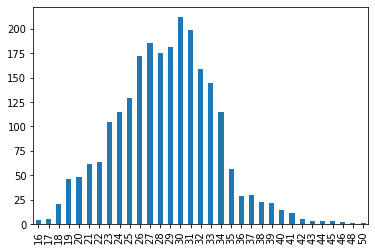

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

merge_result['age'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

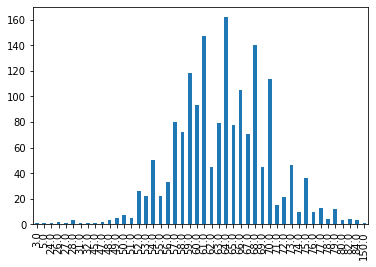

In [66]:
merge_result['weight(kg)'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

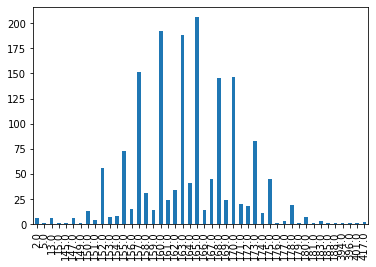

In [67]:
merge_result['height(cm)'].value_counts().sort_index().plot(kind='bar')

In [68]:
merge_result['weight(kg)'].value_counts()

64.0     162
61.0     147
68.0     140
59.0     118
70.0     114
66.0     105
60.0      93
57.0      80
63.0      79
65.0      78
58.0      72
67.0      71
54.0      50
73.0      46
69.0      45
62.0      45
75.0      36
56.0      33
52.0      26
53.0      22
55.0      22
72.0      21
71.0      15
77.0      13
79.0      12
74.0      10
76.0      10
50.0       7
51.0       5
49.0       5
78.0       4
82.0       4
48.0       3
80.0       3
28.0       3
84.0       3
26.0       2
47.0       2
32.0       1
150.0      1
45.0       1
31.0       1
27.0       1
5.0        1
3.0        1
24.0       1
Name: weight(kg), dtype: int64

In [69]:
merge_result['height(cm)'].value_counts()

165.0    206
160.0    192
163.0    188
157.0    151
170.0    146
168.0    145
173.0     83
155.0     73
152.0     56
167.0     45
175.0     45
164.0     41
162.0     34
158.0     31
161.0     24
169.0     24
171.0     20
178.0     19
172.0     18
156.0     15
166.0     14
159.0     14
150.0     13
174.0     11
154.0      8
153.0      7
180.0      7
147.0      6
2.0        6
13.0       6
151.0      4
177.0      3
183.0      3
417.0      2
5.0        1
181.0      1
185.0      1
188.0      1
176.0      1
394.0      1
396.0      1
149.0      1
401.0      1
15.0       1
179.0      1
145.0      1
Name: height(cm), dtype: int64

In [73]:
merge_result['height(cm)'].value_counts(dropna=False).sort_index()

2.0        6
5.0        1
13.0       6
15.0       1
145.0      1
147.0      6
149.0      1
150.0     13
151.0      4
152.0     56
153.0      7
154.0      8
155.0     73
156.0     15
157.0    151
158.0     31
159.0     14
160.0    192
161.0     24
162.0     34
163.0    188
164.0     41
165.0    206
166.0     14
167.0     45
168.0    145
169.0     24
170.0    146
171.0     20
172.0     18
173.0     83
174.0     11
175.0     45
176.0      1
177.0      3
178.0     19
179.0      1
180.0      7
181.0      1
183.0      3
185.0      1
188.0      1
394.0      1
396.0      1
401.0      1
417.0      2
NaN      670
Name: height(cm), dtype: int64

In [72]:
merge_result['weight(kg)'].value_counts(dropna=False).sort_index()

3.0        1
5.0        1
24.0       1
26.0       2
27.0       1
28.0       3
31.0       1
32.0       1
45.0       1
47.0       2
48.0       3
49.0       5
50.0       7
51.0       5
52.0      26
53.0      22
54.0      50
55.0      22
56.0      33
57.0      80
58.0      72
59.0     118
60.0      93
61.0     147
62.0      45
63.0      79
64.0     162
65.0      78
66.0     105
67.0      71
68.0     140
69.0      45
70.0     114
71.0      15
72.0      21
73.0      46
74.0      10
75.0      36
76.0      10
77.0      13
78.0       4
79.0      12
80.0       3
82.0       4
84.0       3
150.0      1
NaN      628
Name: weight(kg), dtype: int64

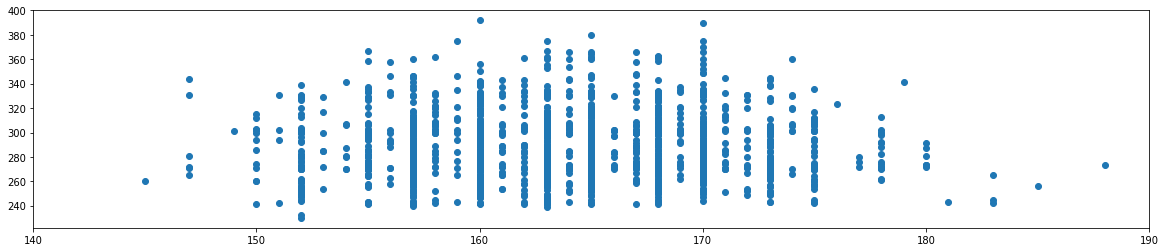

In [86]:
plt.figure().set_figwidth(20)
plt.scatter(merge_result['height(cm)'], merge_result['22.1Score(reps)'])
plt.xlim([140, 190])
plt.show()

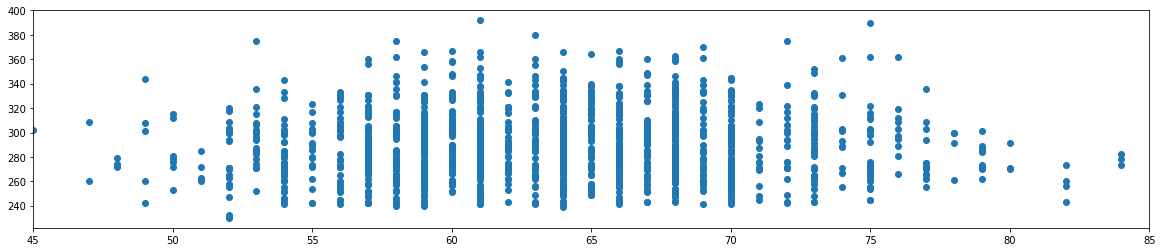

In [88]:
plt.figure().set_figwidth(20)
plt.scatter(merge_result['weight(kg)'], merge_result['22.1Score(reps)'])
plt.xlim([45, 85])
plt.show()

look at heatmap for open workout results vs qf ranking

In [96]:
merge_result[['age', 'name']]

,age,name
0,18,Mallory O'Brien
1,28,Tia-Clair Toomey
2,21,Haley Adams
3,27,Brooke Wells
4,32,Emma McQuaid
...,...,...
2337,29,Julieta Andrade
2338,18,Zoe Stull
2339,26,Aldana Ingram
2340,31,Katherine Duke


<AxesSubplot:>

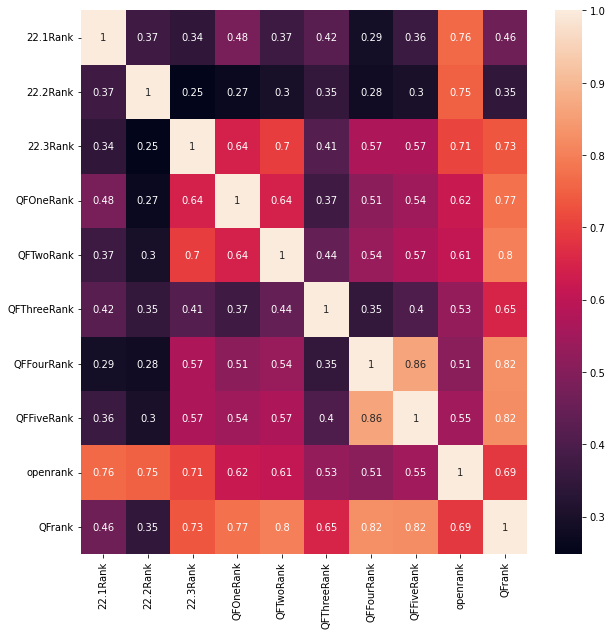

In [101]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(abs(merge_result[['22.1Rank', '22.2Rank', '22.3Rank', 'QFOneRank', 'QFTwoRank', 'QFThreeRank', 'QFFourRank', 'QFFiveRank', 'openrank', 'QFrank']].dropna().corr()), annot=True, ax=ax)

this shows